## Exam 1: HR Data Analysis
Load the core_dataset.csv file. The Excel workbook revolves around a fictitious company, called Dental Magic, and the core data set contains names, DOBs, age, gender, marital status, date of hire, reasons for termination, department, whether they are active or terminated, position title, pay rate, manager name, and performance score.

In [1]:
# import libraries
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

# reading in the data
core = pd.read_csv('core_dataset.csv')

# get dimensions of the train and test sets
# (num_obs, num_features)
core.shape

(301, 21)

Remove the following columns. They are not very important to our analysis. 'Employee Name', 'Employee Number', 'Date of Hire', 'Date of Termination', 'DOB'

In [2]:
# drop unwanted column in place
core.drop(columns=['Employee Name', 'Employee Number',\
                   'Date of Hire', 'Date of Termination', 'DOB'], inplace=True)
core.shape

(301, 16)

## Does Race Affect Pay?
Calculate the average pay rate grouped by the position and race

In [3]:
# group by position and race, then take mean of pay rate
core.groupby(by=['Position','RaceDesc'])['Pay Rate'].mean()

Position                      RaceDesc                        
Accountant I                  Black or African American           25.750000
                              White                               29.000000
Administrative Assistant      Asian                               20.500000
                              White                               19.030000
Area Sales Manager            American Indian or Alaska Native    56.000000
                              Asian                               56.000000
                              Black or African American           55.000000
                              Two or more races                   55.083333
                              White                               55.318182
CIO                           White                               65.000000
Database Administrator        Asian                               41.375000
                              Black or African American           40.200000
                         

Make three plots that shows across all the positions
- histogram for the races with max avg pay per position (example: if you have a total of 5 unique positions and race Hispanic was the max in 3 of them and asian was max in one and white was max in 1, then the histogram should show hispanic with count of 3, asian with count of 1 and white with count of 1)
- histogram for the races with min avg pay per position
- the difference  between the max avg pay and the min avag pay for each position on a bar plot


Hint: There are many ways to solve this. one of them is using the grouped by frame you got earlier, form three lists, each answers one of the following questions
- which race has the max avg pay corresponding to each position
- which race has the max avg pay corresponding to each position
- the difference between the max avg pay and min avg pay corresponding to each position

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 3600x720 with 0 Axes>

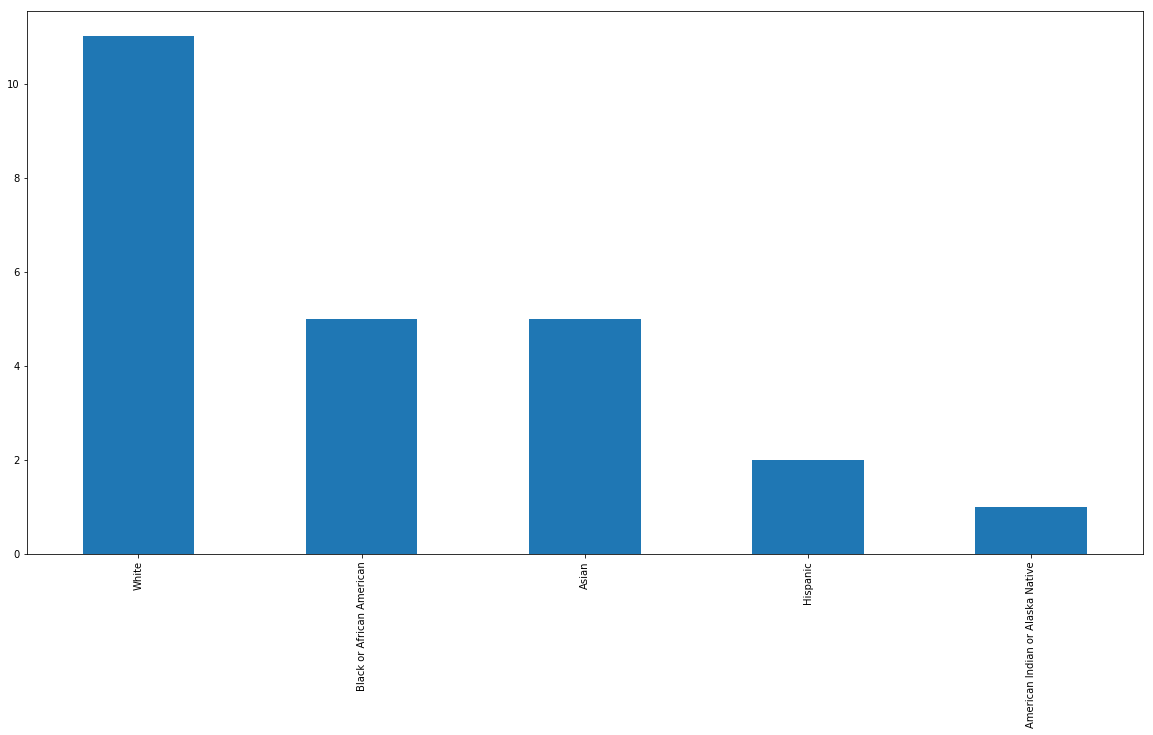

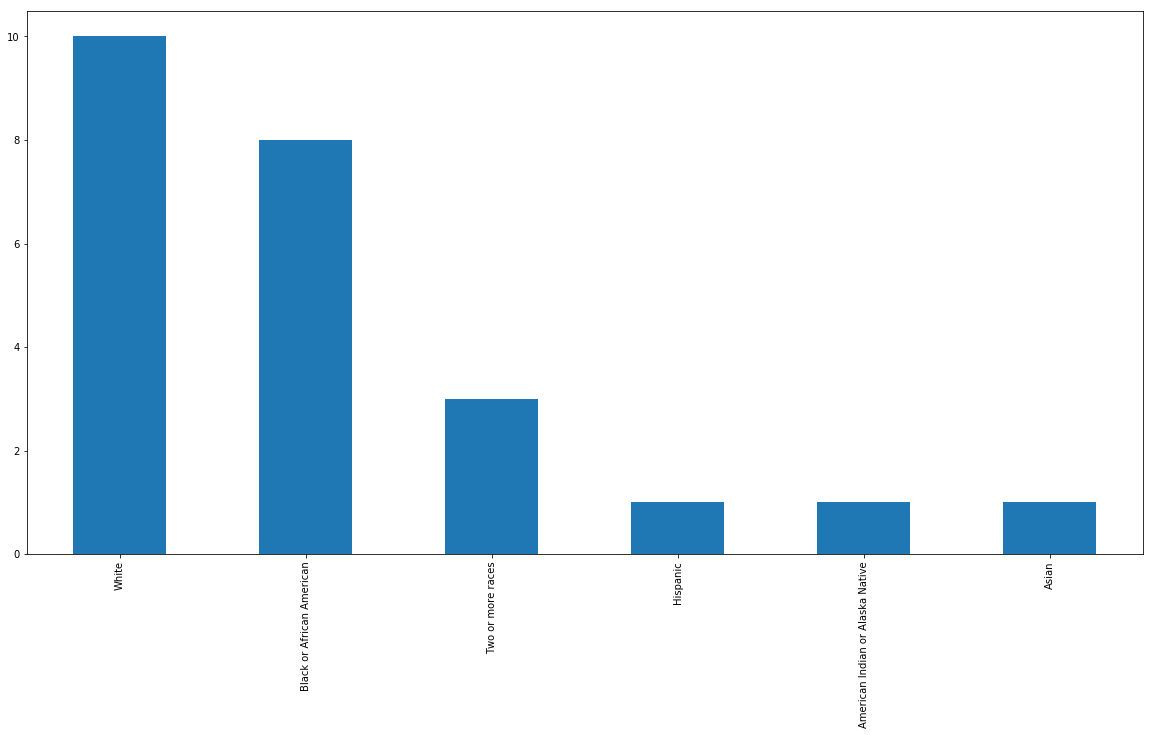

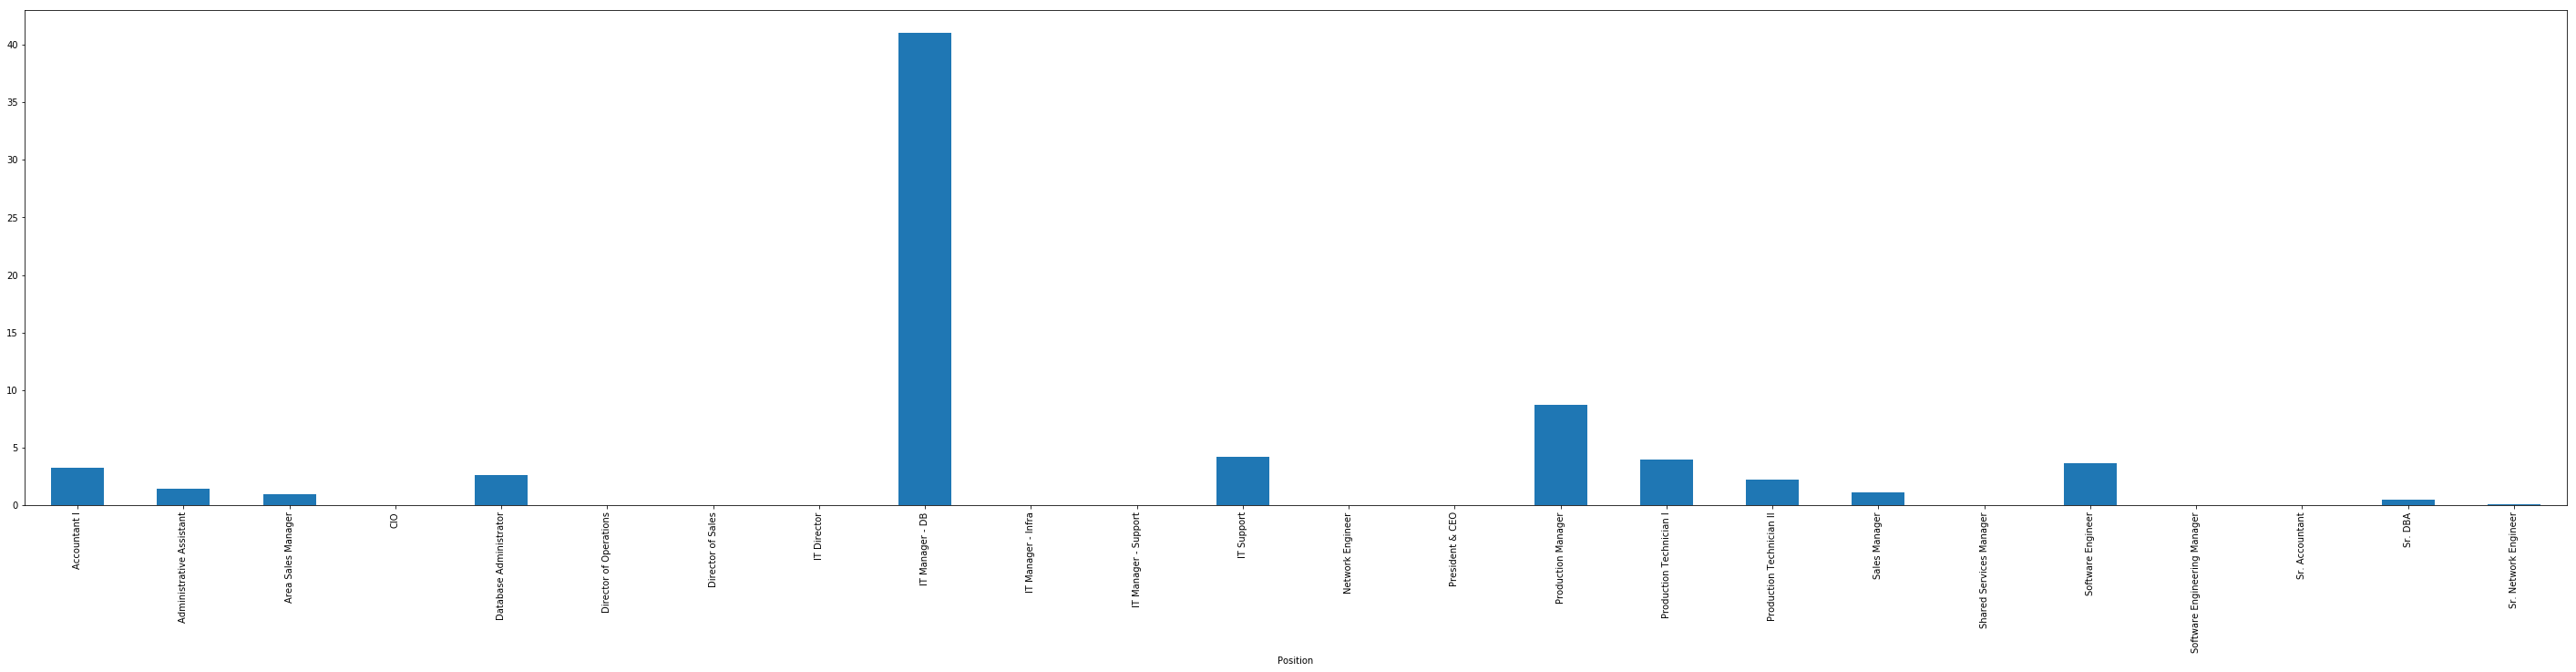

In [4]:
# histogram #1 - count of how many times a race shows as max avg pay
plt.figure(figsize=(20,10))
temp_max = core.groupby(by=['Position','RaceDesc'])['Pay Rate'].mean().reset_index()
temp_max = temp_max.sort_values(['Position','Pay Rate'], ascending=False)
temp_max = temp_max.groupby(by=['Position']).first()
temp_max
pd.value_counts(temp_max['RaceDesc']).plot(kind='bar')

# histogram #2 - count of how many times a race shows as min avg pay
plt.figure(figsize=(20,10))
temp_min = core.groupby(by=['Position','RaceDesc'])['Pay Rate'].mean().reset_index()
temp_min = temp_min.sort_values(['Position','Pay Rate'], ascending=True)
temp_min = temp_min.groupby(by=['Position']).first()
temp_min
pd.value_counts(temp_min['RaceDesc']).plot(kind='bar')

# histogram #3 - shows the pay gap per position, large value means large gap
plt.figure(figsize=(50,10))
temp_diff = pd.merge(temp_max, temp_min, on=['Position'])
temp_diff['diff'] = (temp_diff['Pay Rate_x']-temp_diff['Pay Rate_y'])
temp_diff
temp_diff['diff'].plot(kind='bar')

## Does Gender Affect Pay?
repeat the same analysis but with gender. i.e., replace race with gender.

<Figure size 1440x720 with 0 Axes>

,Sex,Pay Rate
Position,,
Accountant I,Female,28.500000
Administrative Assistant,Female,19.520000
Area Sales Manager,Male,55.333333
CIO,Female,65.000000
Database Administrator,Female,39.885714
Director of Operations,Female,60.000000
Director of Sales,Female,60.000000
IT Director,Male,65.000000
IT Manager - DB,Male,41.500000


<Figure size 1440x720 with 0 Axes>

,Sex,Pay Rate
Position,,
Accountant I,Male,26.000000
Administrative Assistant,Female,19.520000
Area Sales Manager,Female,55.083333
CIO,Female,65.000000
Database Administrator,Male,39.000000
Director of Operations,Female,60.000000
Director of Sales,Female,60.000000
IT Director,Male,65.000000
IT Manager - DB,Male,41.500000


<Figure size 3600x720 with 0 Axes>

,Sex_x,Pay Rate_x,Sex_y,Pay Rate_y,diff
Position,,,,,
Accountant I,Female,28.500000,Male,26.000000,2.500000
Administrative Assistant,Female,19.520000,Female,19.520000,0.000000
Area Sales Manager,Male,55.333333,Female,55.083333,0.250000
CIO,Female,65.000000,Female,65.000000,0.000000
Database Administrator,Female,39.885714,Male,39.000000,0.885714
Director of Operations,Female,60.000000,Female,60.000000,0.000000
Director of Sales,Female,60.000000,Female,60.000000,0.000000
IT Director,Male,65.000000,Male,65.000000,0.000000
IT Manager - DB,Male,41.500000,Male,41.500000,0.000000


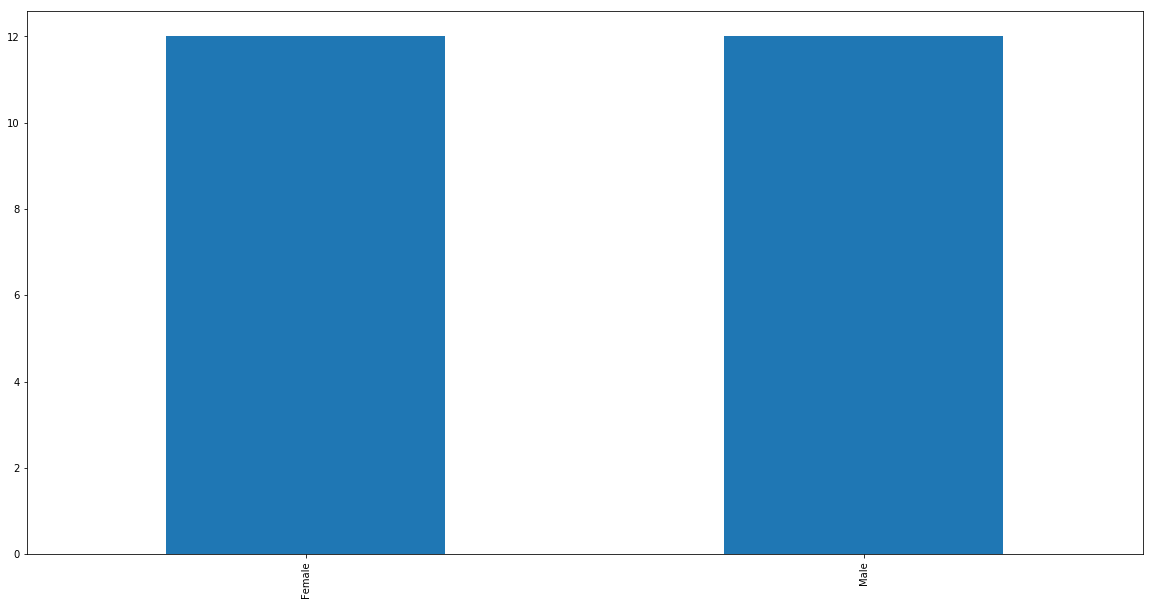

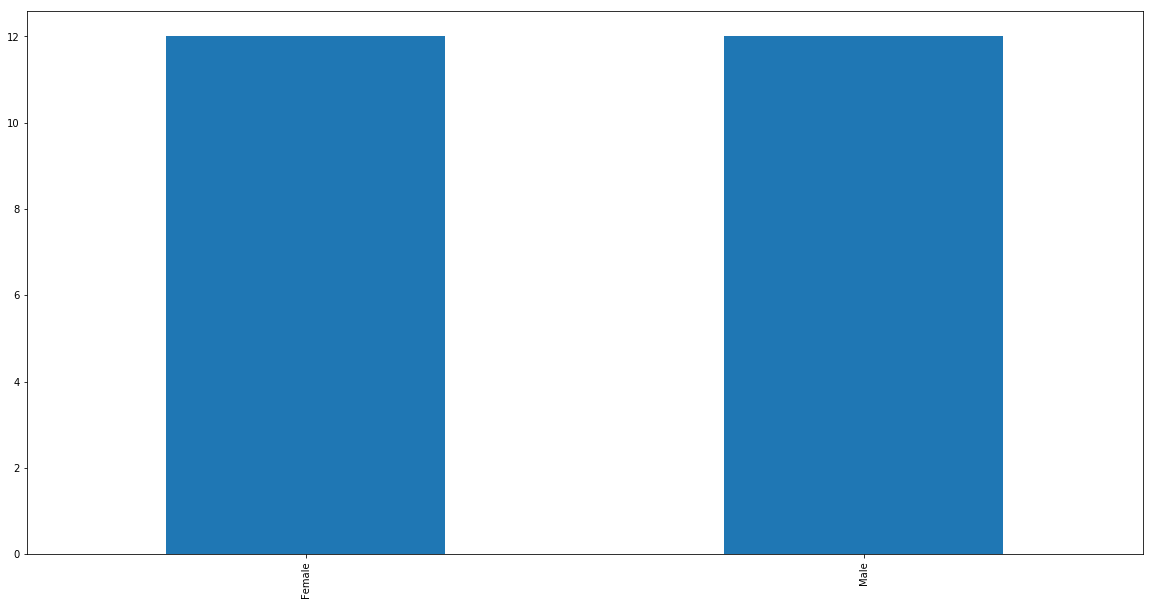

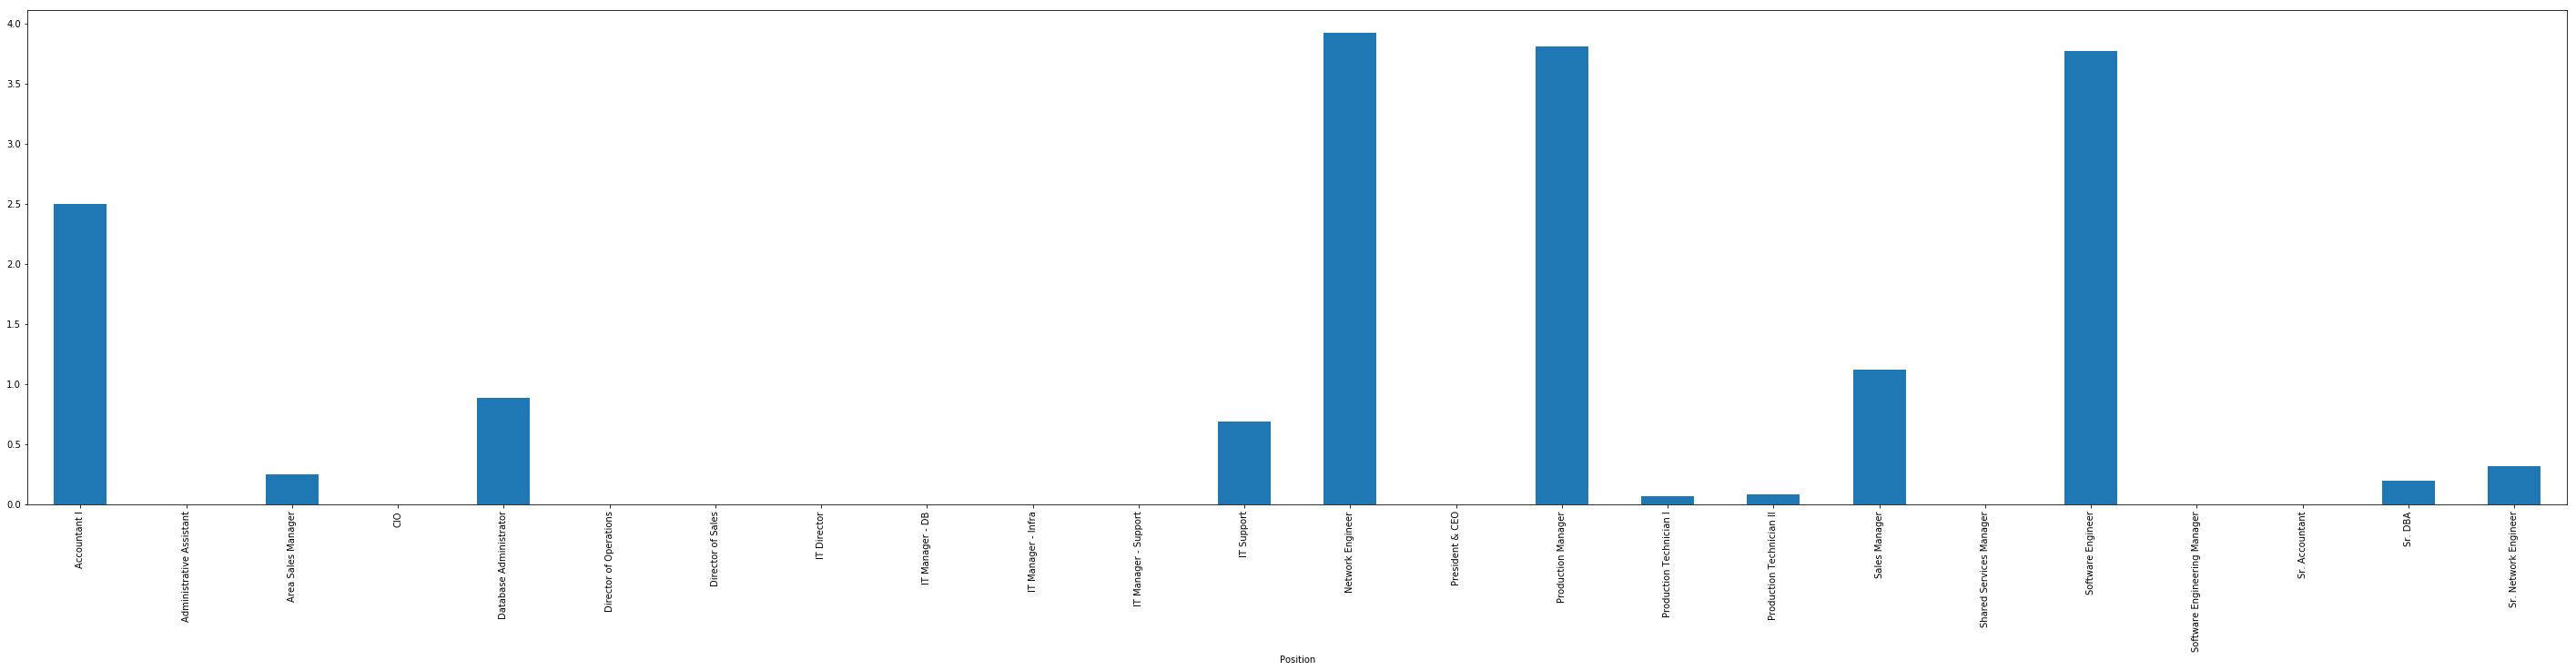

In [5]:
# repeating steps from above
# histogram #1 - count of how many times a sex shows as max avg pay
plt.figure(figsize=(20,10))
temp_max = core.groupby(by=['Position','Sex'])['Pay Rate'].mean().reset_index()
temp_max = temp_max.sort_values(['Position','Pay Rate'], ascending=False)
temp_max = temp_max.groupby(by=['Position']).first()
temp_max
# IMPORTANT - original data set contains capitalization inconsistencies (Male vs male)
# Since there only one instance, I made the edit directly in the .csv file
pd.value_counts(temp_max['Sex']).plot(kind='bar')

# histogram #2 - count of how many times a sex shows as min avg pay
plt.figure(figsize=(20,10))
temp_min = core.groupby(by=['Position','Sex'])['Pay Rate'].mean().reset_index()
temp_min = temp_min.sort_values(['Position','Pay Rate'], ascending=True)
temp_min = temp_min.groupby(by=['Position']).first()
temp_min
pd.value_counts(temp_min['Sex']).plot(kind='bar')

# histogram #3 - shows the pay gap per position, large value means larger gap
plt.figure(figsize=(50,10))
temp_diff = pd.merge(temp_max, temp_min, on=['Position'])
temp_diff['diff'] = (temp_diff['Pay Rate_x']-temp_diff['Pay Rate_y'])
temp_diff
temp_diff['diff'].plot(kind='bar')

# Predict Pay Rate using Linear Regression

convert needed features to categories and numbers instead of letters

In [6]:
# convert all categories into numerical values
core['State'] = core['State'].astype('category').cat.codes
core['Sex'] = core['Sex'].astype('category').cat.codes
core['MaritalDesc'] = core['MaritalDesc'].astype('category').cat.codes
core['CitizenDesc'] = core['CitizenDesc'].astype('category').cat.codes
core['Hispanic/Latino'] = core['Hispanic/Latino'].astype('category').cat.codes
core['RaceDesc'] = core['RaceDesc'].astype('category').cat.codes
core['Reason For Term'] = core['Reason For Term'].astype('category').cat.codes
core['Employment Status'] = core['Employment Status'].astype('category').cat.codes
core['Department'] = core['Department'].astype('category').cat.codes
core['Position'] = core['Position'].astype('category').cat.codes
core['Manager Name'] = core['Manager Name'].astype('category').cat.codes
core['Employee Source'] = core['Employee Source'].astype('category').cat.codes
core['Performance Score'] = core['Performance Score'].astype('category').cat.codes
# core


Make sure your data does not have nans. You can drop any rows with nans

In [7]:
# check to see which features have nulls
core.isna().sum() # check before
core.dropna(inplace=True)
core.isna().sum() # check after
# nulls appear to have been removed by previous, category conversion step

State                0
Zip                  0
Age                  0
Sex                  0
MaritalDesc          0
CitizenDesc          0
Hispanic/Latino      0
RaceDesc             0
Reason For Term      0
Employment Status    0
Department           0
Position             0
Pay Rate             0
Manager Name         0
Employee Source      0
Performance Score    0
dtype: int64

State                0
Zip                  0
Age                  0
Sex                  0
MaritalDesc          0
CitizenDesc          0
Hispanic/Latino      0
RaceDesc             0
Reason For Term      0
Employment Status    0
Department           0
Position             0
Pay Rate             0
Manager Name         0
Employee Source      0
Performance Score    0
dtype: int64

Split your data into 25% testing. Use random_state = 66. 

In [8]:
# seperate feature from target and split the data into train and test
features = core.drop(columns=['Pay Rate'])
target = core['Pay Rate']
x_train, x_test, y_train, y_test = train_test_split(features,\
                                   target, test_size=0.25, random_state = 66)

Do any data preporcessing needed

In [9]:
# library that standardizes data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)

E:\Users\Dhyan Gandhi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
E:\Users\Dhyan Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int8, int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


Fit your Linear regression model to predict the rates

In [10]:
# create a scaled linear model with scaled values 
model_scaled = LinearRegression().fit(x_train_scaled, y_train)
y_train_pred = model_scaled.predict(x_train_scaled)
y_test_pred = model_scaled.predict(scaler.transform(x_test))

# train and test accuracy scaled
# model_scaled.score(x_train_scaled,y_train)
# model_scaled.score(scaler.transform(x_test),y_test)

# unscaled model creation and prediction
# model = LinearRegression().fit(x_train, y_train)
# train_pred = model.predict(x_train)
# test_pred = model.predict(x_test)

# train and test accuracy unscaled
# model.score(x_train, y_train)
# model.score(x_test, y_test)

E:\Users\Dhyan Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int8, int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


Calculate the training and test MSE

In [11]:
# note that the MSE doesn't change much between scaled and unscaled
# uncommented is predictions using scaled features
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, y_train_pred) # training set
mean_squared_error(y_test, y_test_pred) # testing set

# mean_squared_error(y_train, train_pred)
# mean_squared_error(y_test, test_pred)

160.43897488941022

232.39376778317978

Do a plot that shows the importance of each feature on predicting the rates

<Figure size 2160x720 with 0 Axes>

<BarContainer object of 15 artists>

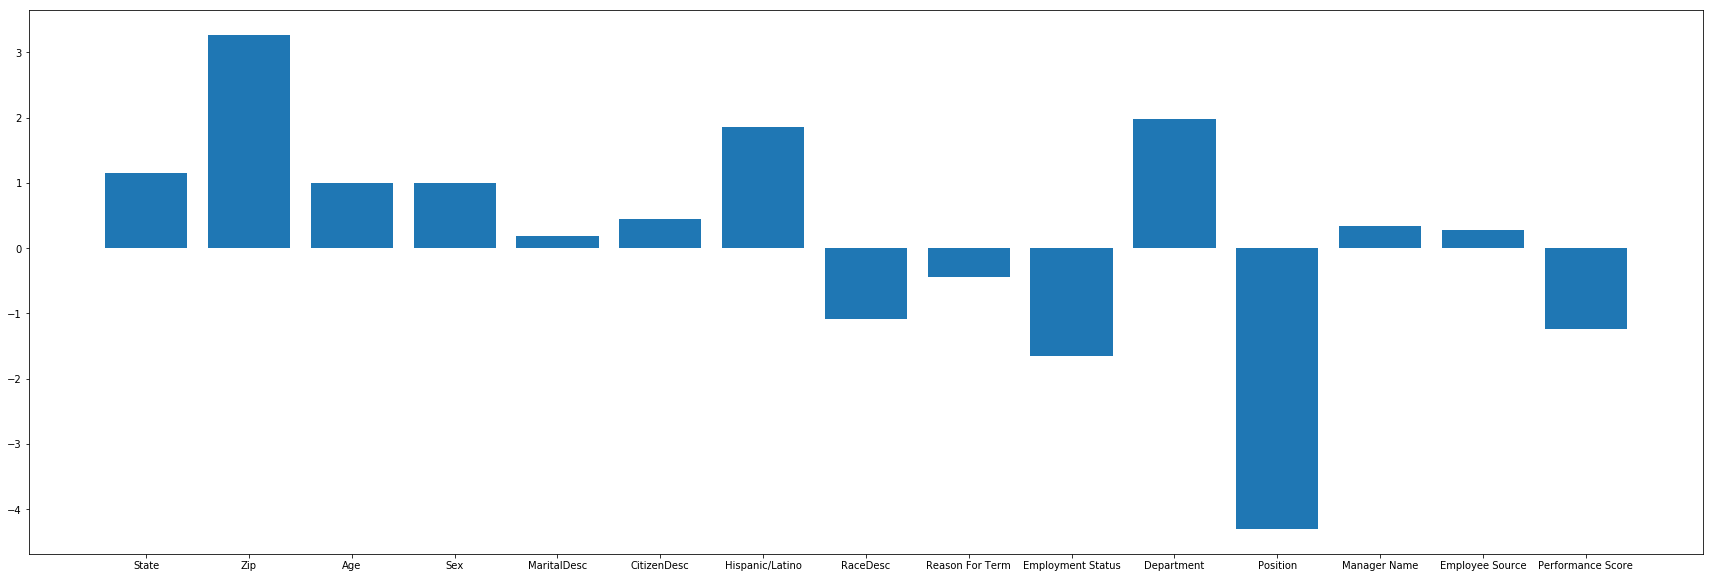

In [12]:
# display the optimal weights by feature (scaled)
plt.figure(figsize=(30,10))
plt.bar(features.columns, model_scaled.coef_)
# plt.bar(features.columns, model.coef_)